<a href="https://colab.research.google.com/github/EstivenAstaiza/talento-tech/blob/main/Trabajo_Final_Talento_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Analisis Diabetes**
**Descripción general del dataset:**
El data set utilizado el de Diebetes de sklearn este dataset contiene información sobre pacientes y características relacionadas con la diabetes.


**Características del dataset:** <br>
Número total de características: 10
Características numéricas:Todas las características son numéricas <br>
Características categóricas: No hay características categóricas explícitas<br>
Variable objetivo: Se binariza la variable target original (continua) para crear una variable categórica

**Características numéricas:**<br>
age: Edad <br>
sex: Sexo <br>
bmi: Índice de masa corporal <br>
bp: Presión arterial media <br>
s1: Nivel de colesterol total en suero <br>
s2: Lipoproteínas de baja densidad (LDL)<br>
s3: Lipoproteínas de alta densidad (HDL)<br>
s4: Nivel de colesterol en suero<br>
s5: Nivel de triglicéridos en suero<br>
s6: Nivel de azúcar en sangre<br>

# **2. Objetivo del proyecto:**
El objetivo principal es predecir el riesgo de diabetes en pacientes basándose en sus características médicas. Esto se realiza mediante una combinación de técnicas de clustering y clasificación.<br>
Para realizar esto se pide el nombre del paciente y unos valores metricos como:<br>
El indice de masa corporal(bmi), la precion arterial(bp) y el nivel de colesterol total en suero(s1)

**Resumen del análisis:**<br>
**a) Preprocesamiento de datos:**

Se carga el dataset de diabetes y se crea un DataFrame.
Se binariza la variable objetivo (target) para aplicar regresión logística.

**b) Análisis exploratorio:**

Se visualiza la matriz de correlaciones entre las características.<br>

**c) Clustering:**

Se seleccionan tres características para el clustering: 'bmi', 'bp', y 's1'.
Se aplica el algoritmo K-means con 3 clusters.
Se visualizan los clusters utilizando PCA para reducir la dimensionalidad.

**d) Modelado predictivo:**

Se utiliza regresión logística para predecir el riesgo de diabetes.
Se divide el dataset en conjuntos de entrenamiento y prueba.
Se evalúa el modelo utilizando métricas como precisión, exactitud y recall.

**e) Aplicación práctica:**

Se implementa una función para que el usuario ingrese sus datos y obtener una predicción sobre su riesgo de diabetes.


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [94]:
# Cargar dataset de diabetes
datos = load_diabetes()
print(datos.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [95]:
datos

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [96]:
# Crear DataFrame
df = pd.DataFrame(datos.data, columns=datos.feature_names)
df['Target'] = (datos.target > np.median(datos.target)).astype(int)  # Binarizamos el target para aplicar regresión logística

# Visualizar primeras filas del dataset
print(df.head(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646       1  
1 -0.039493 -0.068332 -0.092204       0  
2 -0.002592  0.002861 -0.025930       1  
3  0.034309  0.022688 -0.009362       1  
4 -0.002592 -0.031988 -0.046641       0  


In [97]:
# Selección de variables para clustering
columnas_seleccionadas = ['bmi', 'bp', 's1']
X_clustering = df[columnas_seleccionadas]


In [98]:
# Estandarización de las características
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)


In [99]:
# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_clustering, df['Target'], test_size=0.3, random_state=42)


In [100]:
# Modelo de Regresión Logística
modelo = LogisticRegression()

In [101]:
# Aquí se implementa la validación cruzada
# ------------------------------------------
scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='accuracy')

# Imprimir el resultado de la validación cruzada
print(f'Exactitud promedio con validación cruzada: {scores.mean()}')
print(f'Desviación estándar de la validación cruzada: {scores.std()}')

# ------------------------------------------

Exactitud promedio con validación cruzada: 0.7155913978494624
Desviación estándar de la validación cruzada: 0.10420819498240769


In [102]:
# Visualizar correlaciones
columnas = df.columns.values
MC = np.corrcoef(df[columnas].values.T)

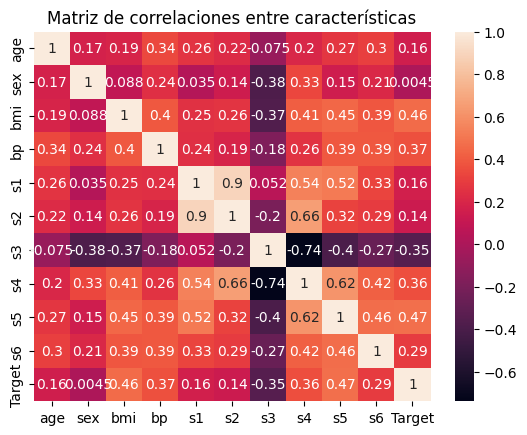

In [103]:
# Graficar mapa de calor de la matriz de correlaciones
sns.heatmap(MC, yticklabels=columnas, xticklabels=columnas, cbar=True, annot=True)
plt.title('Matriz de correlaciones entre características')
plt.show()

In [104]:
# Selección de variables
columnas_seleccionadas = ['bmi', 'bp', 's1', 'Target']
df_filtrado = df[columnas_seleccionadas]
X_clustering = df[columnas_seleccionadas]

In [105]:
# División de los datos en características (X) y la variable objetivo (y)
X = df_filtrado.drop(['Target'], axis=1)
y = df_filtrado['Target']


In [106]:
# Estandarización de las características
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)
###############

In [107]:
# Estandarización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
# Aplicar algoritmo de clustering K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
# Añadir los clusters al DataFrame
df['Cluster'] = clusters


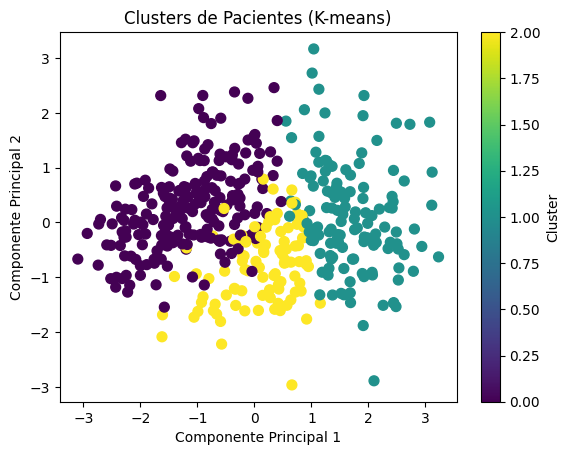

In [110]:
# Visualización de clusters con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_clustering)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters de Pacientes (K-means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [111]:
# Clustering y regresión logística
X = df_filtrado.drop(['Target'], axis=1)
y = df_filtrado['Target']

In [112]:
# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [113]:
# Modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [114]:
# Predicción
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

In [115]:
# Evaluación del modelo
matriz_confusion = metrics.confusion_matrix(y_test, y_pred_test)
print(f'Matriz de Confusión:\n{matriz_confusion}')


Matriz de Confusión:
[[53 19]
 [18 43]]


In [116]:
# Métricas de evaluación
precision = metrics.precision_score(y_test, y_pred_test)
exactitud = metrics.accuracy_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)

print(f'Precisión: {precision}')
print(f'Exactitud: {exactitud}')
print(f'Recall: {recall}')

Precisión: 0.6935483870967742
Exactitud: 0.7218045112781954
Recall: 0.7049180327868853


In [117]:
# Mostrar resultados en porcentaje
print(f'Precisión: {precision * 100:.2f}%')
print(f'Exactitud: {exactitud * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')

Precisión: 69.35%
Exactitud: 72.18%
Recall: 70.49%


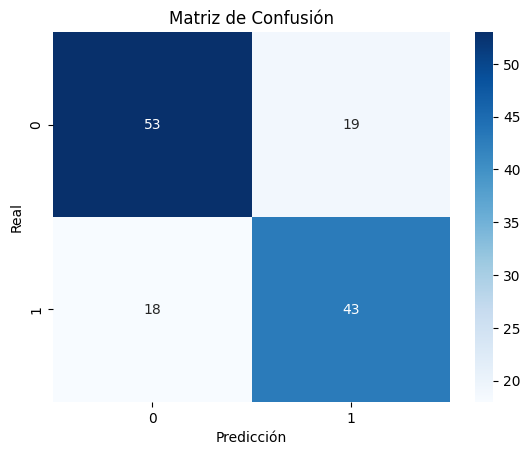

In [118]:
# Visualización de la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [119]:
# Predicción con entrada del usuario
nombre = input("Ingrese su nombre: ")
print("Ingrese los valores de 'bmi', 'bp', 's1'")
bmi = float(input("Ingrese el valor para bmi: "))
bp = float(input("Ingrese el valor para bp: "))
s1 = float(input("Ingrese el valor para s1: "))

Ingrese su nombre: Juan Perez
Ingrese los valores de 'bmi', 'bp', 's1'
Ingrese el valor para bmi: -09
Ingrese el valor para bp: 1
Ingrese el valor para s1: -98


In [120]:
# Crear DataFrame con los datos ingresados por el usuario
dato_entrada = pd.DataFrame([[bmi, bp, s1]], columns=['bmi', 'bp', 's1'])

In [121]:
# Estandarizar los datos de entrada
dato_entrada_scaled = scaler.transform(dato_entrada)

In [122]:
# Realizar la predicción
prediccion = modelo.predict(dato_entrada_scaled)

In [123]:
# Mostrar el resultado al usuario
if prediccion == 1:
    print(f"{nombre}, según los valores ingresados, el sistema predice que tiene riesgo de diabetes.")
else:
    print(f"{nombre}, según los valores ingresados, el sistema predice que no tiene riesgo de diabetes.")

Juan Perez, según los valores ingresados, el sistema predice que tiene riesgo de diabetes.


# **Conclusión general:**<br>
El análisis combina técnicas de aprendizaje no supervisado (clustering) y supervisado (clasificación) para abordar el problema de predecir el riesgo de diabetes. El clustering ayuda a identificar grupos de pacientes con características similares, mientras que la regresión logística se utiliza para la clasificación binaria del riesgo de diabetes.<br>
Los resultados en promedio que da el analisis:<br>
Precisión: 69.35%
Exactitud: 72.18%
Recall: 70.49%
<br> aunque usando validadcion cruzada la exactitud puede subir en este caso en promedio subio a 71.5%.